In [17]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import os

def import_from_excel(e_file, filename):
    kinase_targets = [(e_file['kinase target'].tolist())[0]]
    JS_scores = [(e_file['JS Distance Score'].tolist())[0]]
    off_targets = [(e_file['off-target %inhibition values'].tolist())[0]]
    mu = int(filename.split('.')[0].split('_')[-2])
    return [mu, kinase_targets, JS_scores, off_targets]

test_results_200 = []
test_results_700 = []

for filename in os.listdir(os.getcwd()+'/results/'):
    if filename[0] != '.' and filename[0] != '~':
        f = './results/'+str(filename)
        replicate_results = []
        for x in range(2,6):
            open_file = pd.read_excel(f, str(x))
            inhibitor_combination = import_from_excel(open_file, filename)
            replicate_results.append((x,inhibitor_combination))
        if replicate_results[0][1][0] == 200:
            test_results_200.append(replicate_results)
        elif replicate_results[0][1][0] == 700:
            test_results_700.append(replicate_results)
        
PKIS2_data=pd.read_excel("./PKIS2_dataset.xlsx")
all_kinase_names = [str(['AKT1', 'MTOR'])]
        
#check to make sure we have 5 sets of results for each       
print(len(test_results_200))
print(len(test_results_700))

5
5


["['AKT1', 'MTOR']"] [0.9586069795612833]
["['AKT1', 'MTOR']"] [0.9593773856566001]
["['AKT1', 'MTOR']"] [0.9591663052199153]
["['AKT1', 'MTOR']"] [0.9586353647026835]
["['AKT1', 'MTOR']"] [0.9584083258966684]
["['AKT1', 'MTOR']"] [0.9598424474700589]
["['AKT1', 'MTOR']"] [0.9589633080833272]
["['AKT1', 'MTOR']"] [0.9589395782129225]
["['AKT1', 'MTOR']"] [0.9584829002996614]
["['AKT1', 'MTOR']"] [0.959735628498029]
["['AKT1', 'MTOR']"] [0.9593332395545743]
["['AKT1', 'MTOR']"] [0.9587276890941594]
["['AKT1', 'MTOR']"] [0.9585649037205307]
["['AKT1', 'MTOR']"] [0.959136924298044]
["['AKT1', 'MTOR']"] [0.9590173215847864]
["['AKT1', 'MTOR']"] [0.9585459529570284]
["['AKT1', 'MTOR']"] [0.9586941065836129]
["['AKT1', 'MTOR']"] [0.9594489122837401]
["['AKT1', 'MTOR']"] [0.9593956625734935]
["['AKT1', 'MTOR']"] [0.9588469473004703]
0.9585514432123514 0.9595082596412944 0.00010955546566254894


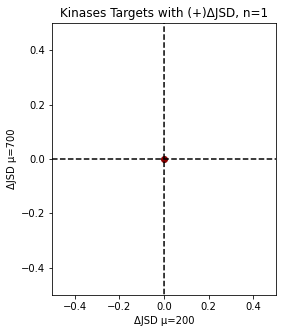

In [19]:
#check to see what the maximum inhibitor concentration # is that we should use
import matplotlib.patches as mpatches
max_inhib_num = 5


#for each kinase, get the set of scores at i=1, i=2, i=3 etc

organized_results_200 = {}
organized_results_700 = {}

for replicate_200 in test_results_200:    #in each of the 5 test replicates
    for individual_result in replicate_200:    #for each combination
        inhibitor_combination_number = individual_result[0]     
        k_names = individual_result[1][1]
        JS_scores = individual_result[1][2]
        print(k_names, JS_scores)
        for i in range(0, len(k_names)):
            if k_names[i] not in organized_results_200:
                organized_results_200[k_names[i]] = [[] for x in range(0,max_inhib_num)]
            organized_results_200[k_names[i]][inhibitor_combination_number-1].append(JS_scores[i])
            
for replicate_700 in test_results_700:    #in each of the 5 test replicates
    for individual_result in replicate_700:    #for each combination
        inhibitor_combination_number = individual_result[0]     
        k_names = individual_result[1][1]
        JS_scores = individual_result[1][2]
        for i in range(0, len(k_names)):
            if k_names[i] not in organized_results_700:
                organized_results_700[k_names[i]] = [[] for x in range(0,max_inhib_num)]
            organized_results_700[k_names[i]][inhibitor_combination_number-1].append(JS_scores[i])

#determine which condition has the maximum mean score, what the difference is from the i=1 mean score, 
#and if that difference is significant or not

x_200_scored_kinase_names = []
x_200_values = []
x_sig = []
max_200_vals = []

y_700_scored_kinase_names = []
y_700_values = []
y_sig = []
max_700_vals = []

for kinase in organized_results_200:
    #get the i=1 conition
    i2_mean = np.mean(organized_results_200[kinase][1])
    i2_values = organized_results_200[kinase][1]
    max_other_combination = 0
    max_other_combination_values = []
    significant = 0
    #compare to higher combination #s
    for j in range(2, max_inhib_num):
        if organized_results_200[kinase][j] != []:
            i_combo_mean = np.mean(organized_results_200[kinase][j])
            if i_combo_mean > max_other_combination:
                max_other_combination = i_combo_mean
                max_other_combination_values = organized_results_200[kinase][j]
    max_200_vals.append(max_other_combination)
    #is the difference significant?
    tval, pval = stats.ttest_ind(i2_values, max_other_combination_values)
    if (pval < 0.05) and (np.mean(max_other_combination_values) > (i2_mean)):
        significant = 1
    JS_score_difference = max_other_combination - i2_mean
    x_200_scored_kinase_names.append(kinase)
    x_200_values.append(JS_score_difference)
    x_sig.append(significant)
    print(i2_mean, max_other_combination, pval)
    
for kinase in organized_results_700:
    #get the i=1 conition
    i2_mean = np.mean(organized_results_700[kinase][1])
    i2_values = organized_results_700[kinase][1]
    max_other_combination = 0
    max_other_combination_values = []
    significant = 0
    #compare to higher combination #s
    for j in range(2, max_inhib_num):
        if organized_results_700[kinase][j] != []:
            i_combo_mean = np.mean(organized_results_700[kinase][j])
            if i_combo_mean > max_other_combination:
                max_other_combination = i_combo_mean
                max_other_combination_values = organized_results_700[kinase][j]
    max_700_vals.append(max_other_combination)
    #is the difference significant?
    tval, pval = stats.ttest_ind(i2_values, max_other_combination_values)
    if (pval < 0.05) and (np.mean(max_other_combination_values) > (i2_mean)):
        significant = 2
    JS_score_difference = max_other_combination - i2_mean
    y_700_scored_kinase_names.append(kinase)
    y_700_values.append(JS_score_difference)
    y_sig.append(significant)
    
#for each kinase in PKIS2, get the x_val, the y_val, the total significance

final_kinases = []
final_x = []
final_y = []
sum_sig = []

for kinase_target in all_kinase_names:
    #final_kinases.append(kinase_target)
    
    add = True
    x_index = None
    y_index = None
    
    if kinase_target in x_200_scored_kinase_names:
        x_index = x_200_scored_kinase_names.index(kinase_target)
        #final_x.append(x_200_values[x_index])
        #if x_sig[x_index] > 0:
        #    add=True
        #sum_sig.append(x_sig[index])
    #else:
        #final_x.append(0)
        #sum_sig.append(0)
    if kinase_target in y_700_scored_kinase_names:
        y_index = y_700_scored_kinase_names.index(kinase_target)
        #if y_sig[y_index] > 0:
        #    add = True
        #final_y.append(y_700_values[index])
        #sum_sig[-1] = sum_sig[-1] + y_sig[index]
    #else:
        #final_y.append(0)
    if add:
        final_x.append(x_200_values[x_index])
        final_y.append(y_700_values[y_index])
        sum_sig.append(x_sig[x_index]+y_sig[y_index])
        final_kinases.append(kinase_target)

#convert significane to a different color for the points
#black = not significant
#yellow = significant for 200 (1)
#blue = significant for 700 (2)
#cyan = significant for both (3)
point_color = []
total = 0
for value in sum_sig:
    if value == 1:
        point_color.append('darkred')
        total+=1
    elif value == 2:
        point_color.append('b')
        total+=1
    elif value == 3:
        point_color.append('darkorange')
        total+=1
    else:
        point_color.append('k')
       
fig = plt.figure(figsize=(4, 5))
plt.scatter(final_x, final_y, c=point_color)
#total = 0
#for i, label in enumerate(final_kinases):
    #if final_x[i] > 0.025 or final_y[i] > (0.025*1.8): 
        #plt.annotate(label, (final_x[i], final_y[i]))
#    if final_x[i] > 0 or final_y[i] >0:
#        total += 1
plt.xlim((-0.5,0.5))
plt.ylim((-0.5,0.5))
plt.xlabel('ΔJSD μ=200')
plt.ylabel('ΔJSD μ=700')
title = 'Kinases Targets with (+)ΔJSD, n=' + str(total)
plt.title(title)

#finally, add a line that represents an equal improvement to the maximum of 1 in both scales
#the 1 - average max(JSD at i=1) at mu=700 / 1 - average max(JSD at i=1) at mu=200, gives the slope
#essentially, its a scaled measure of how much improvement in the score is possible relative to a maximum of 1.
#note - since it represents the average change, it is possible for some points to represent statistically significant change on one axis but NOT the other

#mu700 = [] #the i=1 scores
#mu200 = [] #the i=1 scores
#for kinase in organized_results_700:
#    mu700.append(np.mean(organized_results_700[kinase][0]))
#for kinase in organized_results_200:
#    mu200.append(np.mean(organized_results_200[kinase][0]))
#slope = (1 - np.mean(mu700)) / (1 - np.mean(mu200))
xv = np.arange(-1,1,0.001)
#yv = xv*slope

zeros = xv*0

#plt.plot(xv,yv,color='g')

plt.plot(xv,zeros,'k--')
plt.plot(zeros,xv,'k--')

plt.show()

#fig.savefig("120121_PKIS2_JSD_700v200_scatterplot.pdf", bbox_inches='tight',dpi=500)

['AKT1', 'MTOR']
0 0
[['[1.7121380156338382, 0, 0, 0.9391124871001006, 0.7007575757575752, 0, 0, 0, 0, 8.002295183018795, 4.771342314117505, 0.8577263444520058, 0, 4.341923643895157, 0, 6.179540709812104, 10.115380710931106, 0, 0, 0, 0, 0, 0.4033290653008951, 3.4457611668185866, 5.144437113121507, 92.69606139984089, 0, 0, 0, 5.197385081514688, 1.1072056239015784, 17.86146594407012, 0, 0, 0, 9.138115785545812, 3.999877193958553, 1.4203454894433774, 6.532163910059063, 1.1940298507462654, 0, 0, 0.7007575757575752, 12.846792617245878, 0, 7.757615035644827, 18.36322869955153, 7.799373410923481, 0, 9.361936193619357, 0, 4.057971014492742, 0.06404391582799615, 0.4033290653008951, 0, 0, 5.326497571505652, 0, 14.025974025973994, 14.745611457507128, 0, 0, 0.26365348399246624, 0, 2.1595330739299596, 0, 0, 0.4752667313288057, 12.45164382668878, 14.025974025973994, 7.496114543597693, 10.491833913437691, 1.610661862368655, 0, 0, 0.1958346285359024, 0.4752667313288057, 3.592233009708728, 5.6915512247

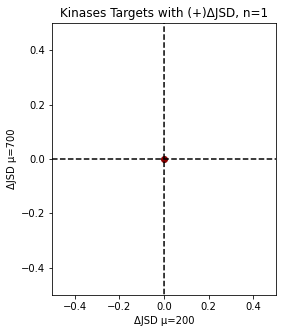

In [50]:
##################################################

# Same as above but set a threshold for changes that are more relevant versus less relevant
# Count the number of kinases that fall over this threshold

#check to see what the maximum inhibitor concentration # is that we should use
max_inhib_num = 5

#for each kinase, get the set of scores at i=1, i=2, i=3 etc

organized_results_200 = {}
organized_results_700 = {}

off_target_values_200 = {}
off_target_values_700 = {}

for replicate_200 in test_results_200:    #in each of the 5 test replicates
    for individual_result in replicate_200:    #for each combination
        inhibitor_combination_number = individual_result[0]     
        k_names = individual_result[1][1]
        JS_scores = individual_result[1][2]
        off_target_values = individual_result[1][3]
        for i in range(0, len(k_names)):
            if k_names[i] not in organized_results_200:
                organized_results_200[k_names[i]] = [[] for x in range(0,max_inhib_num)]
                off_target_values_200[k_names[i]] = [[] for x in range(0,max_inhib_num)]
            organized_results_200[k_names[i]][inhibitor_combination_number-1].append(JS_scores[i])
            off_target_values_200[k_names[i]][inhibitor_combination_number-1].append(off_target_values[i])
            
for replicate_700 in test_results_700:    #in each of the 5 test replicates
    for individual_result in replicate_700:    #for each combination
        inhibitor_combination_number = individual_result[0]     
        k_names = individual_result[1][1]
        JS_scores = individual_result[1][2]
        off_target_values = individual_result[1][3]
        for i in range(0, len(k_names)):
            if k_names[i] not in organized_results_700:
                organized_results_700[k_names[i]] = [[] for x in range(0,max_inhib_num)]
                off_target_values_700[k_names[i]] = [[] for x in range(0,max_inhib_num)]
            organized_results_700[k_names[i]][inhibitor_combination_number-1].append(JS_scores[i])
            off_target_values_700[k_names[i]][inhibitor_combination_number-1].append(off_target_values[i])

#determine which condition has the maximum mean score, what the difference is from the i=1 mean score, 
#and if that difference is significant or not

x_200_scored_kinase_names = []
x_200_values = []
x_sig = []
max_200_vals = []
stdevs_200 = [] #the std of the differences from i=1 to i>1 if i>1 is greater
JSD_200_i1_scores = [] #the raw scores
JSD_200_max_scores = [] #the raw scores
off_target_values_u200 = []
off_target_values_i1_u200 = []

y_700_scored_kinase_names = []
y_700_values = []
y_sig = []
max_700_vals = []
stdevs_700 = [] #the std of the differences from i=1 to i>1 if i>1 is greater
JSD_700_i1_scores = [] #the raw scores
JSD_700_max_scores = [] #the raw scores
off_target_values_u700 = []
off_target_values_i1_u700 = []

for kinase in organized_results_200:
    #get the i=1 conition
    i1_mean = np.mean(organized_results_200[kinase][1])
    i1_values = organized_results_200[kinase][1]
    max_other_combination = 0
    max_other_combination_values = []
    significant = 0
    best_combination_number = None
    #compare to higher combination #s
    for j in range(2, max_inhib_num):
        if organized_results_200[kinase][j] != []:
            i_combo_mean = np.mean(organized_results_200[kinase][j])
            if i_combo_mean > max_other_combination:
                max_other_combination = i_combo_mean
                max_other_combination_values = organized_results_200[kinase][j]
                best_combination_number = j+1
    if max_other_combination_values != []:
        max_200_vals.append(max_other_combination)
        differences = [max_other_combination_values[x] - i1_values[x] for x in range(0,len(i1_values))]
        stdev = np.std(differences)
        stdevs_200.append(stdev)
        #is the difference significant?
        tval, pval = stats.ttest_ind(i1_values, max_other_combination_values)
        if (pval < 0.05) and (np.mean(max_other_combination_values) > (i1_mean)):
            significant = 1
        JS_score_difference = max_other_combination - i1_mean
        x_200_scored_kinase_names.append(kinase)
        x_200_values.append(JS_score_difference)
        x_sig.append(significant)
        JSD_200_i1_scores.append(i1_values)
        JSD_200_max_scores.append(max_other_combination_values)
        off_target_values_u200.append(off_target_values_200[kinase][best_combination_number]) #due to 0 indexing
        off_target_values_i1_u200.append(off_target_values_200[kinase][1])  
    
for kinase in organized_results_700:
    #get the i=1 conition
    i1_mean = np.mean(organized_results_700[kinase][1])
    i1_values = organized_results_700[kinase][1]
    max_other_combination = 0
    max_other_combination_values = []
    significant = 0
    best_combination_number = None
    #compare to higher combination #s
    for j in range(2, max_inhib_num):
        if organized_results_700[kinase][j] != []:
            i_combo_mean = np.mean(organized_results_700[kinase][j])
            if i_combo_mean > max_other_combination:
                max_other_combination = i_combo_mean
                max_other_combination_values = organized_results_700[kinase][j]
                best_combination_number = j+1
    if max_other_combination_values != []:
        max_700_vals.append(max_other_combination)
        differences = [max_other_combination_values[x] - i1_values[x] for x in range(0,len(i1_values))]
        stdev = np.std(differences)
        stdevs_700.append(stdev)
        #is the difference significant?
        tval, pval = stats.ttest_ind(i1_values, max_other_combination_values)
        if (pval < 0.05) and (np.mean(max_other_combination_values) > (i1_mean)):
            significant = 2
        JS_score_difference = max_other_combination - i1_mean
        y_700_scored_kinase_names.append(kinase)
        y_700_values.append(JS_score_difference)
        y_sig.append(significant)
        JSD_700_i1_scores.append(i1_values)
        JSD_700_max_scores.append(max_other_combination_values)
        off_target_values_u700.append(off_target_values_700[kinase][best_combination_number-1]) #due to 0 indexing
        off_target_values_i1_u700.append(off_target_values_700[kinase][1])
        
#for each kinase in PKIS2, get the x_val, the y_val, the total significance

final_kinases = []
final_x = []
final_y = []
sum_sig = []

final_std_200 = []
final_std_700 = []

final_JSD_200_i1 = []
final_JSD_700_i1 = []
final_JSD_200_max = []
final_JSD_700_max = []

final_JSD_200_i1_stdev = []
final_JSD_700_i1_stdev = []
final_JSD_200_max_stdev = []
final_JSD_700_max_stdev = []

final_200_off_target_values = []
final_700_off_target_values = []

final_i1_200_off_target_values = []
final_i1_700_off_target_values = []

#print(off_target_values_u200)

for kinase_target in all_kinase_names:
    #final_kinases.append(kinase_target)
    
    print(kinase_target)
    
    add = True
    x_index = None
    y_index = None
    
    if kinase_target in x_200_scored_kinase_names:
        x_index = x_200_scored_kinase_names.index(kinase_target)
        #final_x.append(x_200_values[x_index])
        if x_sig[x_index] > 0:
            add=True
        #sum_sig.append(x_sig[index])
    #else:
        #final_x.append(0)
        #sum_sig.append(0)
    if kinase_target in y_700_scored_kinase_names:
        y_index = y_700_scored_kinase_names.index(kinase_target)
        if y_sig[y_index] > 0:
            add = True
        #final_y.append(y_700_values[index])
        #sum_sig[-1] = sum_sig[-1] + y_sig[index]
    #else:
        #final_y.append(0)
    if add:
        print(x_index,y_index)
        final_x.append(x_200_values[x_index])
        final_y.append(y_700_values[y_index])
        sum_sig.append(x_sig[x_index]+y_sig[y_index])
        final_kinases.append(kinase_target)
        final_std_700.append(stdevs_700[y_index]) # the std of the differences in score
        final_std_200.append(stdevs_200[x_index]) #the std off the differences in score
        
        final_JSD_200_i1.append(np.mean(JSD_200_i1_scores[x_index]))
        final_JSD_200_max.append(np.mean(JSD_200_max_scores[x_index]))
        final_JSD_200_i1_stdev.append(np.std(JSD_200_i1_scores[x_index]))
        final_JSD_200_max_stdev.append(np.std(JSD_200_max_scores[x_index]))
        
        final_JSD_700_i1.append(np.mean(JSD_700_i1_scores[y_index]))
        final_JSD_700_max.append(np.mean(JSD_700_max_scores[y_index]))
        final_JSD_700_i1_stdev.append(np.std(JSD_700_i1_scores[y_index]))
        final_JSD_700_max_stdev.append(np.std(JSD_700_max_scores[y_index]))
        
        final_200_off_target_values.append(off_target_values_u200[x_index])
        final_700_off_target_values.append(off_target_values_u700[y_index])
        
        final_i1_200_off_target_values.append(off_target_values_i1_u200[x_index])
        final_i1_700_off_target_values.append(off_target_values_i1_u700[y_index])
        
print(off_target_values_i1_u200)
        
#convert significane to a different color for the points
#black = not significant
#yellow = significant for 200 (1)
#blue = significant for 700 (2)
#cyan = significant for both (3)
point_color = []
total = 0
for value in sum_sig:
    if value == 1:
        point_color.append('darkred')
        total+=1
    elif value == 2:
        point_color.append('b')
        total+=1
    elif value == 3:
        point_color.append('darkorange')
        total+=1
    else:
        point_color.append('k')
       
fig = plt.figure(figsize=(4, 5))
plt.scatter(final_x, final_y, c=point_color)
#total = 0
#for i, label in enumerate(final_kinases):
    #if final_x[i] > 0.025 or final_y[i] > (0.025*1.8): 
        #plt.annotate(label, (final_x[i], final_y[i]))
#    if final_x[i] > 0 or final_y[i] >0:
#        total += 1
plt.xlim((-0.5,0.5))
plt.ylim((-0.5,0.5))
plt.xlabel('ΔJSD μ=200')
plt.ylabel('ΔJSD μ=700')
title = 'Kinases Targets with (+)ΔJSD, n=' + str(total)
plt.title(title)

#finally, add a line that represents an equal improvement to the maximum of 1 in both scales
#the 1 - average max(JSD at i=1) at mu=700 / 1 - average max(JSD at i=1) at mu=200, gives the slope
#essentially, its a scaled measure of how much improvement in the score is possible relative to a maximum of 1.
#note - since it represents the average change, it is possible for some points to represent statistically significant change on one axis but NOT the other

xv = np.arange(-1,1,0.001)
zeros = xv*0

plt.plot(xv,zeros,'k--')
plt.plot(zeros,xv,'k--')

plt.show()

#fig.savefig("120121_PKIS2_JSD_700v200_scatterplot.pdf", bbox_inches='tight',dpi=500)

TypeError: type str doesn't define __round__ method

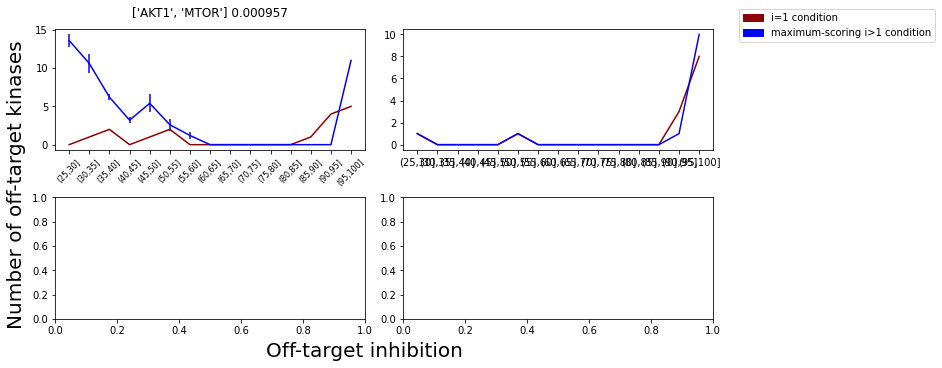

In [55]:
#Lets make a plot for each of these tracking the change in off-target activity and the number of off-target kinases
#We need to get all 5 groups of off-target values, and then average the 5 lists at each relative position
#Then we can plot the number of off-target kinases (+/- std for the 5 replicates) for the i=1 versus i>1 conditions

nrows = 2
ncols = 2

fig, axes = plt.subplots(nrows, ncols, figsize=(10,5),constrained_layout=True)

fig.supxlabel('Off-target inhibition', fontsize=20)
fig.supylabel('Number of off-target kinases', fontsize=20)

i1_patch = mpatches.Patch(color='darkred', label='i=1 condition')
max_patch = mpatches.Patch(color='b', label='maximum-scoring i>1 condition')

fig.legend(handles=[i1_patch,max_patch],bbox_to_anchor=(1.3, 1))

#axes[0][0].set_xlabel('Prior shape: μ=200',fontsize=15)
#axes[0][1].set_xlabel('Prior shape: μ=700',fontsize=15)

for i in range(0, 1):
    k = res[i][1]
    score200 = res[i][2]
    score700 = res[i][3]
    
    index = final_kinases.index(k)
    
    off_target_200_i1_init = final_i1_200_off_target_values[index]
    off_target_700_i1_init = final_i1_700_off_target_values[index]
    
    off_target_200_max_init = final_200_off_target_values[index]
    off_target_700_max_init = final_700_off_target_values[index]
    
    ot_200_max = []
    ot_700_max = []
    i1_200 = []
    i1_700 = []
    
    for temp in off_target_200_max_init:
        vals = (temp[1:-1]).split(', ')
        vals = [float(x) for x in vals]
        ot_200_max.append(vals)
        
    for temp in off_target_700_max_init:
        vals = (temp[1:-1]).split(', ')
        vals = [float(x) for x in vals]
        ot_700_max.append(vals)
        
    for temp in off_target_200_i1_init:
        vals = (temp[1:-1]).split(', ')
        vals = [float(x) for x in vals]
        i1_200.append(vals)
        
    for temp in off_target_700_i1_init:
        vals = (temp[1:-1]).split(', ')
        vals = [float(x) for x in vals]
        i1_700.append(vals)
        
    #for each of the 5 technical replicates, construct bins for each
    #afterwards, we will average (an get the std) for each of the frequencies over the 5 technical replicates
    
    #print(i1_200)
    
    i1_200_binned = []
    
    for replicate in i1_200:
        bins = [0 for i in range(0,20)] #bin size=5 for the final off-target distribution
        for x in range(0, len(replicate)): #for every point in the set of sample noise (100 per measrument), add it to the distribution
            temp = int(replicate[x]/5)
            if temp < 20 and temp >= 0:
                bins[temp] += 1.0
            elif temp >= 20:
                bins[len(bins)-1] += 1.0
            else:
                bins[0] += 1.0
        i1_200_binned.append(bins)
        
    i1_700_binned = []
    
    for replicate in i1_700:
        bins = [0 for i in range(0,20)] #bin size=5 for the final off-target distribution
        for x in range(0, len(replicate)): #for every point in the set of sample noise (100 per measrument), add it to the distribution
            temp = int(replicate[x]/5)
            if temp < 20 and temp >= 0:
                bins[temp] += 1.0
            elif temp >= 20:
                bins[len(bins)-1] += 1.0
            else:
                bins[0] += 1.0
        i1_700_binned.append(bins)
        
        
    max_200_binned = []
    
    for replicate in ot_200_max:
        bins = [0 for i in range(0,20)] #bin size=5 for the final off-target distribution
        for x in range(0, len(replicate)): #for every point in the set of sample noise (100 per measrument), add it to the distribution
            temp = int(replicate[x]/5)
            if temp < 20 and temp >= 0:
                bins[temp] += 1.0
            elif temp >= 20:
                bins[len(bins)-1] += 1.0
            else:
                bins[0] += 1.0
        max_200_binned.append(bins)
        
    max_700_binned = []
    
    for replicate in ot_700_max:
        bins = [0 for i in range(0,20)] #bin size=5 for the final off-target distribution
        for x in range(0, len(replicate)): #for every point in the set of sample noise (100 per measrument), add it to the distribution
            temp = int(replicate[x]/5)
            if temp < 20 and temp >= 0:
                bins[temp] += 1.0
            elif temp >= 20:
                bins[len(bins)-1] += 1.0
            else:
                bins[0] += 1.0
        max_700_binned.append(bins)   
    
    avg_i1_200=list(np.average(i1_200_binned, axis=0))
    std_i1_200=list(np.std(i1_200_binned, axis=0))
    
    avg_i1_700=list(np.average(i1_700_binned, axis=0))
    std_i1_700=list(np.std(i1_700_binned, axis=0))
    
    avg_max_200=list(np.average(max_200_binned, axis=0))
    std_max_200=list(np.std(max_200_binned, axis=0))
    
    avg_max_700=list(np.average(max_700_binned, axis=0))
    std_max_700=list(np.std(max_700_binned, axis=0))
    
    bin_max = ['0','(0,5)', '(5,10]', '(10,15]', '(15,20]', '(25,30]',
               '(30,35]', '(35,40]', '(40,45]', '(45,50]', '(50,55]',
               '(55,60]', '(60,65]', '(65,70]', '(70,75]', '(75,80]',
               '(80,85]', '(85,90]', '(90,95]', '(95,100]']
    
    #only plot from 20 upwards
    bin_max_200 = bin_max[5:]
    avg_i1_200 = avg_i1_200[5:]
    std_i1_200 = std_i1_200[5:]
    avg_max_200 = avg_max_200[5:]
    std_max_200 = std_max_200[5:]
    
    bin_max_700 = bin_max[5:]
    avg_i1_700 = avg_i1_700[5:]
    std_i1_700 = std_i1_700[5:]
    avg_max_700 = avg_max_700[5:]
    std_max_700 = std_max_700[5:]
    
    ylim200_a = max(avg_i1_200)
    ylim200_b = max(avg_max_200)
    ylim_200 = max([ylim200_a,ylim200_b])
    
    axes[i][0].errorbar(bin_max_200, avg_i1_200, yerr=std_i1_200,xerr=None, color='darkred')
    axes[i][0].errorbar(bin_max_200, avg_max_200, yerr=std_max_200,xerr=None, color='blue')
    axes[i][0].set_title(k+' '+str(round(score200,6)), x=0.5, y=1.05)
    axes[i][0].tick_params(axis='x', labelsize=8, rotation=45)
    
    axes[i][1].errorbar(bin_max_700, avg_i1_700, yerr=std_i1_700,xerr=None, color='darkred')
    axes[i][1].errorbar(bin_max_700, avg_max_700, yerr=std_max_700,xerr=None, color='blue')
    axes[i][1].set_title(k+' '+str(round(score700,6)), x=0.5, y=1.05)
    axes[i][1].tick_params(axis='x', labelsize=8, rotation=45)
    
    #add a vertical line to represent where the on-target prior becomes innefectual in either
    thresh1 = np.arange(0,int(ylim_200*1.2),0.01)
    xlim = [5]*len(thresh1)
    axes[i][0].plot(xlim,thresh1,'k--')
    axes[i][0].set_ylim((-0.2,int(ylim_200*1.2)))
    
    #axes[i][0].set_ylim(0, 10)
    #axes[i][1].set_ylim(0, 10)
        
    #now we need to 
    
fig.savefig("120821_PKIS2_JSD_700v200_19_kinase-specific-plots-1-2.pdf", bbox_inches='tight',dpi=500)